<a href="https://colab.research.google.com/github/afvallejo/AD_2023/blob/main/Cellphonedb_AD_Final_TcellsDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scanpy

In [ ]:
import scanpy as sc
import matplotlib
import matplotlib.pyplot as pl
#import anndata2ri
import numpy as np
import scipy as sp
import pandas as pd
#import re
#anndata2ri.activate()
#%load_ext rpy2.ipython

In [ ]:
%cd /home/jupyter/bucket/AD_Final/Aligned/

/home/jupyter/bucket/AD_Final/Aligned


In [ ]:
folder='/home/jupyter/bucket/AD_Final/Aligned/'
#folder='/home/jupyter/bucket/20200519_DC_LPS_Dropseq/RNA_velocity/'

samplename='TcellsDC'

import os
os.chdir(folder)
if not os.path.exists('./figures'):
    os.makedirs('./figures')

random_state = 42
metric = "euclidean"
# Filtering criteria
flavor="cell_ranger"
n_top_genes = 3000
BBKNN="False"
n_neighbors = 10
#PCA
n_comps=50
#neighbors
num_PCA = 30
n_pcs=30
resolution=0.5

In [ ]:
adata=sc.read("TcellsDC_leiden_cl_vst.h5ad")
adata

AnnData object with n_obs × n_vars = 2889 × 20902
    obs: 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'doublet_score', 'predicted_doublet', 'sample', 'Donnor', 'Treatment', 'Condition', 'treatmentcondition', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'annotated', 'CD8.TE', 'NKT', 'CD4.CM', 'CD4.Naive', 'Treg', 'Plasmablast', 'CD14_mono', 'pDC', 'CD16_mono', 'CD4.Th2', 'ILC2', 'CD4.IL22', 'CD8.EM', 'Plasma_cell_IgA', 'NK_56hi', 'Platelets', 'CD8.Naive', 'B_non-switched_memory', 'C1_CD16_mono', 'Mono_prolif', 'CD4.EM', 'ASDC', 'DC_prolif', 'NK_16hi', 'RBC', 'CD4.Prolif', 'DC1', 'gdT', 'DC3', 'Plasma_cell_IgM', 'DC2', 'Plasma_cell_IgG', 'CD83_CD

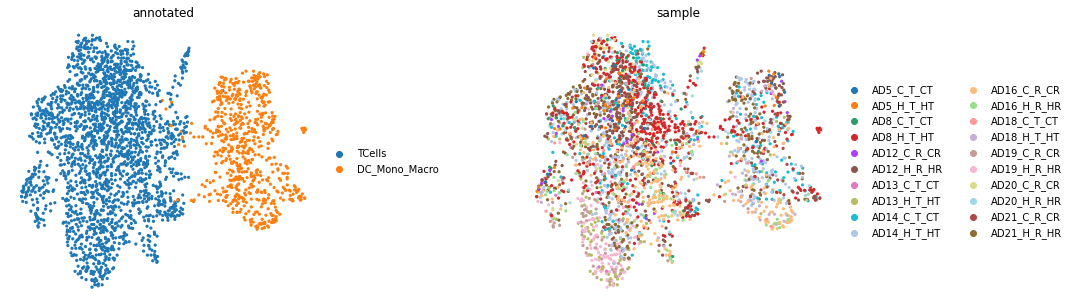

In [ ]:

pl.rcParams['figure.figsize']=(5,5)
#sc.tl.leiden(adata,random_state=random_state, resolution = 0.5)
savefig=samplename+"_clustering_vst_bbknn.pdf"
sc.pl.umap(adata, color=['annotated','sample'],legend_fontoutline=3, 
           hspace=0.5,wspace=0.5,legend_fontweight='normal',frameon=False,save=savefig)

In [ ]:
print(adata.obs['treatmentcondition'].value_counts())

HT    1156
HR     890
CR     533
CT     310
Name: treatmentcondition, dtype: int64


In [ ]:
# using corrected counts as X
adata.X=adata.layers["sct_corrected"]
adata.X = sp.sparse.csr_matrix(adata.X)
sc.pp.log1p(adata)
adata.layers["logcounts"] = adata.X

####################################
#using pearsons residuals as X
####################################

#adata.X=adata.layers["sct_residuals"]
#adata.layers["logcounts"] = adata.X

In [ ]:
adata1= adata[adata.obs['treatmentcondition'].isin(['CR']),:].copy()
adata1

AnnData object with n_obs × n_vars = 533 × 20902
    obs: 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'doublet_score', 'predicted_doublet', 'sample', 'Donnor', 'Treatment', 'Condition', 'treatmentcondition', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'annotated', 'CD8.TE', 'NKT', 'CD4.CM', 'CD4.Naive', 'Treg', 'Plasmablast', 'CD14_mono', 'pDC', 'CD16_mono', 'CD4.Th2', 'ILC2', 'CD4.IL22', 'CD8.EM', 'Plasma_cell_IgA', 'NK_56hi', 'Platelets', 'CD8.Naive', 'B_non-switched_memory', 'C1_CD16_mono', 'Mono_prolif', 'CD4.EM', 'ASDC', 'DC_prolif', 'NK_16hi', 'RBC', 'CD4.Prolif', 'DC1', 'gdT', 'DC3', 'Plasma_cell_IgM', 'DC2', 'Plasma_cell_IgG', 'CD83_CD1

In [ ]:
# using corrected counts as X
adata1.X=adata1.layers["sct_corrected"]
adata1.X = sp.sparse.csr_matrix(adata1.X)
sc.pp.log1p(adata1)
adata1.layers["logcounts"] = adata1.X



In [ ]:
adata2= adata[adata.obs['treatmentcondition'].isin(['HR']),:].copy()
adata2

AnnData object with n_obs × n_vars = 890 × 20902
    obs: 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'doublet_score', 'predicted_doublet', 'sample', 'Donnor', 'Treatment', 'Condition', 'treatmentcondition', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'annotated', 'CD8.TE', 'NKT', 'CD4.CM', 'CD4.Naive', 'Treg', 'Plasmablast', 'CD14_mono', 'pDC', 'CD16_mono', 'CD4.Th2', 'ILC2', 'CD4.IL22', 'CD8.EM', 'Plasma_cell_IgA', 'NK_56hi', 'Platelets', 'CD8.Naive', 'B_non-switched_memory', 'C1_CD16_mono', 'Mono_prolif', 'CD4.EM', 'ASDC', 'DC_prolif', 'NK_16hi', 'RBC', 'CD4.Prolif', 'DC1', 'gdT', 'DC3', 'Plasma_cell_IgM', 'DC2', 'Plasma_cell_IgG', 'CD83_CD1

In [ ]:
adata3= adata[adata.obs['treatmentcondition'].isin(['CT']),:].copy()
adata3

AnnData object with n_obs × n_vars = 310 × 20902
    obs: 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'doublet_score', 'predicted_doublet', 'sample', 'Donnor', 'Treatment', 'Condition', 'treatmentcondition', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'annotated', 'CD8.TE', 'NKT', 'CD4.CM', 'CD4.Naive', 'Treg', 'Plasmablast', 'CD14_mono', 'pDC', 'CD16_mono', 'CD4.Th2', 'ILC2', 'CD4.IL22', 'CD8.EM', 'Plasma_cell_IgA', 'NK_56hi', 'Platelets', 'CD8.Naive', 'B_non-switched_memory', 'C1_CD16_mono', 'Mono_prolif', 'CD4.EM', 'ASDC', 'DC_prolif', 'NK_16hi', 'RBC', 'CD4.Prolif', 'DC1', 'gdT', 'DC3', 'Plasma_cell_IgM', 'DC2', 'Plasma_cell_IgG', 'CD83_CD1

In [ ]:
adata4= adata[adata.obs['treatmentcondition'].isin(['HT']),:].copy()
adata4

AnnData object with n_obs × n_vars = 1156 × 20902
    obs: 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'doublet_score', 'predicted_doublet', 'sample', 'Donnor', 'Treatment', 'Condition', 'treatmentcondition', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'annotated', 'CD8.TE', 'NKT', 'CD4.CM', 'CD4.Naive', 'Treg', 'Plasmablast', 'CD14_mono', 'pDC', 'CD16_mono', 'CD4.Th2', 'ILC2', 'CD4.IL22', 'CD8.EM', 'Plasma_cell_IgA', 'NK_56hi', 'Platelets', 'CD8.Naive', 'B_non-switched_memory', 'C1_CD16_mono', 'Mono_prolif', 'CD4.EM', 'ASDC', 'DC_prolif', 'NK_16hi', 'RBC', 'CD4.Prolif', 'DC1', 'gdT', 'DC3', 'Plasma_cell_IgM', 'DC2', 'Plasma_cell_IgG', 'CD83_CD

In [ ]:
adata.obs

,batch,n_counts,log_counts,n_genes,mt_frac,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,...,MigDC_gene,VE2_gene,Pericyte_1_gene,Mast_cell_gene,LC_3_gene,Treg_gene,Pericyte_2_gene,Macro_2_gene,Macro_1_gene,Differentiated_KC_gene
barcode,,,,,,,,,,,,,,,,,,,,,
AAACGAAGTGCACAAG-0,0,8626.0,9.062536,2281,0.018872,2281,7.732808,8626.0,9.062652,25.828889,...,-0.061011,-0.026227,0.016654,0.109420,-0.043509,0.339299,-0.028614,-0.045974,0.028779,-0.021256
AAACGAAGTGTGCTTA-0,0,4423.0,8.394573,1429,0.048254,1429,7.265430,4423.0,8.394799,29.278770,...,0.123935,-0.002467,0.052712,-0.041895,-0.033257,0.323379,0.023543,0.090653,-0.017899,-0.023214
AAAGGATAGCAGCAGT-0,0,4933.0,8.503702,1337,0.016816,1337,7.198931,4933.0,8.503905,31.765660,...,0.116271,-0.022047,-0.033343,-0.010309,-0.023153,0.209170,0.073154,0.300795,0.016076,0.066966
AAAGGGCCAGACACCC-0,0,6576.0,8.791182,1745,0.013440,1745,7.465083,6576.0,8.791334,25.349757,...,0.039791,-0.014272,-0.048594,-0.051657,0.027031,0.006915,-0.070926,-0.020641,0.009448,-0.012234
AACAACCAGTGTTGTC-0,0,12327.0,9.419547,2469,0.018513,2469,7.811973,12327.0,9.419628,22.519672,...,-0.001355,-0.024874,-0.021231,0.078277,0.040294,0.082343,-0.076240,-0.067039,0.026568,-0.019266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTGGATCTCATGGA-4,4,3430.0,8.140316,1319,0.075229,1319,7.185387,3430.0,8.140607,36.938776,...,0.532154,-0.006531,-0.013979,0.010269,0.577144,-0.113076,-0.000204,0.673708,0.451674,0.310435
TTGTTTGTCCAAACCA-4,4,1354.0,7.210818,606,0.148589,606,6.408529,1354.0,7.211557,37.075332,...,-0.002245,0.041000,-0.031358,-0.057841,0.030482,0.128966,-0.051674,-0.054644,-0.045537,-0.008998
TTTCATGTCCTCTCGA-4,4,2321.0,7.749753,954,0.011446,954,6.861711,2321.0,7.750184,32.529082,...,0.165110,0.074635,-0.030190,0.038296,0.225412,-0.078354,0.001489,0.565893,0.115902,-0.021110


In [ ]:
annot_key = ['leiden_r1', 'sample', 'Treatment','Condition','treatmentcondition']
gene_names = adata1.var.index

counts = pd.DataFrame(adata1.X.toarray().T, index = gene_names, columns = adata1.obs_names)
meta = pd.DataFrame(adata1.obs[annot_key])
counts.to_csv('CR_allsamples_HVG_counts.tsv', sep = '\t')
meta.to_csv('CR_allsamples_HVG_meta.tsv', sep = '\t')

In [ ]:
annot_key = ['leiden_r1', 'sample', 'Treatment','Condition','treatmentcondition']
gene_names = adata2.var.index

counts = pd.DataFrame(adata2.X.toarray().T, index = gene_names, columns = adata2.obs_names)
meta = pd.DataFrame(adata2.obs[annot_key])
counts.to_csv('HR_allsamples_HVG_counts.tsv', sep = '\t')
meta.to_csv('HR_allsamples_HVG_meta.tsv', sep = '\t')

In [ ]:
annot_key = ['leiden_r1', 'sample', 'Treatment','Condition','treatmentcondition']
gene_names = adata3.var.index

counts = pd.DataFrame(adata3.X.toarray().T, index = gene_names, columns = adata3.obs_names)
meta = pd.DataFrame(adata3.obs[annot_key])
counts.to_csv('CT_allsamples_HVG_counts.tsv', sep = '\t')
meta.to_csv('CT_allsamples_HVG_meta.tsv', sep = '\t')

In [ ]:
annot_key = ['leiden_r1', 'sample', 'Treatment','Condition','treatmentcondition']
gene_names = adata4.var.index

counts = pd.DataFrame(adata4.X.toarray().T, index = gene_names, columns = adata4.obs_names)
meta = pd.DataFrame(adata4.obs[annot_key])
counts.to_csv('HT_allsamples_HVG_counts.tsv', sep = '\t')
meta.to_csv('HT_allsamples_HVG_meta.tsv', sep = '\t')

# CellphoneDB run

In [ ]:
from future.utils import iteritems

import os
import importlib as imp
import collections
import copy

import pandas as pd

import pypath.mapping as mapping
import pypath.session_mod as session_mod
import pypath.main as main_mod
import pypath.network as network_mod
import pypath.data_formats as data_formats
import pypath.annot as annot
import pypath.intercell as intercell
import pypath.omnipath as omnipath


	=== d i s c l a i m e r ===

	All data accessed through this module,
	either as redistributed copy or downloaded using the
	programmatic interfaces included in the present module,
	are free to use at least for academic research or
	education purposes.
	Please be aware of the licenses of all the datasets
	you use in your analysis, and please give appropriate
	credits for the original sources when you publish your
	results. To find out more about data sources please
	look at `src/pypath/resources/data/resources.json` or
	https://omnipathdb.org/info and 
	`pypath.resources.urls.urls`.

[2021-05-04 15:02:11] [pypath] 
	- session ID: `64n7s`
	- working directory: `/home/jupyter/bucket`
	- logfile: `/home/jupyter/bucket/pypath_log/pypath-64n7s.log`
	- pypath version: 0.11.50


ModuleNotFoundError: ignored

In [ ]:
pip install pysftp

In [ ]:
from pypath import *
from pypath.share import settings

In [ ]:
from pypath.inputs import cellphonedb
from pypath.share import settings
settings.setup(network_expand_complexes = False)

In [ ]:

from pypath import omnipath

omnipath

<module 'pypath.omnipath' from '/opt/conda/envs/cpdb/lib/python3.7/site-packages/pypath/omnipath/__init__.py'>

In [ ]:
from pypath import omnipath
cu = omnipath.get_db('curated')
cu

AttributeError: ignored

In [ ]:
!cellphonedb database list_remote

/opt/conda/envs/cpdb/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
version v2.0.0 *latest: released: 2019-06-21T19:55:09Z, url: https://github.com/Teichlab/cellphonedb-data/releases/tag/v2.0.0, compatible: True


In [ ]:
c = cellphonedb.CellPhoneDB()

TypeError: ignored

In [ ]:
%cd /home/jupyter/bucket/AD_Final/Aligned/CellphoneDB/CR

/home/jupyter/bucket/AD_Final/Aligned/CellphoneDB/CR


In [ ]:
ls

CR_allsamples_HVG_counts.tsv  CR_allsamples_HVG_meta.tsv


In [ ]:
%%!
cellphonedb method statistical_analysis CR_allsamples_HVG_meta.tsv --counts-data hgnc_symbol CR_allsamples_HVG_counts.tsv  --threads 16 

['[ ][APP][27/03/21-14:53:38][WARNING] Latest local available version is `v2.0.0`, using it',
 '[ ][APP][27/03/21-14:53:38][WARNING] User selected downloaded database `v2.0.0` is available, using it',
 '[ ][CORE][27/03/21-14:53:38][INFO] Initializing SqlAlchemy CellPhoneDB Core',
 '[ ][CORE][27/03/21-14:53:38][INFO] Using custom database at /home/afvp1f17/.cpdb/releases/v2.0.0/cellphone.db',
 '[ ][APP][27/03/21-14:53:38][INFO] Launching Method cpdb_statistical_analysis_local_method_launcher',
 '[ ][APP][27/03/21-14:53:38][INFO] Launching Method _set_paths',
 '[ ][APP][27/03/21-14:53:38][INFO] Launching Method _load_meta_counts',
 '[ ][CORE][27/03/21-14:53:40][INFO] Launching Method cpdb_statistical_analysis_launcher',
 '[ ][CORE][27/03/21-14:53:40][INFO] Launching Method _counts_validations',
 '[ ][CORE][27/03/21-14:53:40][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:16 Precision:3',
 '[ ][CORE][27/03/21-14:53:44][INFO] Running Real Analysis'

In [ ]:
%cd /home/jupyter/bucket/AD_Final/Aligned/CellphoneDB/HR

/home/jupyter/bucket/AD_Final/Aligned/CellphoneDB/HR


In [ ]:
%%!
cellphonedb method statistical_analysis HR_allsamples_HVG_meta.tsv --counts-data hgnc_symbol HR_allsamples_HVG_counts.tsv  --threads 16 

['[ ][APP][27/03/21-16:49:55][WARNING] Latest local available version is `v2.0.0`, using it',
 '[ ][APP][27/03/21-16:49:55][WARNING] User selected downloaded database `v2.0.0` is available, using it',
 '[ ][CORE][27/03/21-16:49:55][INFO] Initializing SqlAlchemy CellPhoneDB Core',
 '[ ][CORE][27/03/21-16:49:55][INFO] Using custom database at /home/afvp1f17/.cpdb/releases/v2.0.0/cellphone.db',
 '[ ][APP][27/03/21-16:49:55][INFO] Launching Method cpdb_statistical_analysis_local_method_launcher',
 '[ ][APP][27/03/21-16:49:55][INFO] Launching Method _set_paths',
 '[ ][APP][27/03/21-16:49:55][INFO] Launching Method _load_meta_counts',
 '[ ][CORE][27/03/21-16:49:57][INFO] Launching Method cpdb_statistical_analysis_launcher',
 '[ ][CORE][27/03/21-16:49:57][INFO] Launching Method _counts_validations',
 '[ ][CORE][27/03/21-16:49:58][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:16 Precision:3',
 '[ ][CORE][27/03/21-16:50:02][INFO] Running Real Analysis'

In [ ]:
%cd /home/jupyter/bucket/AD_Final/Aligned/CellphoneDB/CT

/home/jupyter/bucket/AD_Final/Aligned/CellphoneDB/CT


In [ ]:
%%!
cellphonedb method statistical_analysis CT_allsamples_HVG_meta.tsv --counts-data hgnc_symbol CT_allsamples_HVG_counts.tsv  --threads 16 

['[ ][APP][27/03/21-15:30:34][WARNING] Latest local available version is `v2.0.0`, using it',
 '[ ][APP][27/03/21-15:30:34][WARNING] User selected downloaded database `v2.0.0` is available, using it',
 '[ ][CORE][27/03/21-15:30:34][INFO] Initializing SqlAlchemy CellPhoneDB Core',
 '[ ][CORE][27/03/21-15:30:34][INFO] Using custom database at /home/afvp1f17/.cpdb/releases/v2.0.0/cellphone.db',
 '[ ][APP][27/03/21-15:30:34][INFO] Launching Method cpdb_statistical_analysis_local_method_launcher',
 '[ ][APP][27/03/21-15:30:34][INFO] Launching Method _set_paths',
 '[ ][APP][27/03/21-15:30:35][INFO] Launching Method _load_meta_counts',
 '[ ][CORE][27/03/21-15:30:35][INFO] Launching Method cpdb_statistical_analysis_launcher',
 '[ ][CORE][27/03/21-15:30:35][INFO] Launching Method _counts_validations',
 '[ ][CORE][27/03/21-15:30:36][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:16 Precision:3',
 '[ ][CORE][27/03/21-15:30:41][INFO] Running Real Analysis'

In [ ]:
%cd /home/jupyter/bucket/AD_Final/Aligned/CellphoneDB/HT

/home/jupyter/bucket/AD_Final/Aligned/CellphoneDB/HT


In [ ]:
%%!
cellphonedb method statistical_analysis HT_allsamples_HVG_meta.tsv --counts-data hgnc_symbol HT_allsamples_HVG_counts.tsv  --threads 16 

['[ ][APP][27/03/21-16:03:38][WARNING] Latest local available version is `v2.0.0`, using it',
 '[ ][APP][27/03/21-16:03:38][WARNING] User selected downloaded database `v2.0.0` is available, using it',
 '[ ][CORE][27/03/21-16:03:38][INFO] Initializing SqlAlchemy CellPhoneDB Core',
 '[ ][CORE][27/03/21-16:03:38][INFO] Using custom database at /home/afvp1f17/.cpdb/releases/v2.0.0/cellphone.db',
 '[ ][APP][27/03/21-16:03:38][INFO] Launching Method cpdb_statistical_analysis_local_method_launcher',
 '[ ][APP][27/03/21-16:03:38][INFO] Launching Method _set_paths',
 '[ ][APP][27/03/21-16:03:38][INFO] Launching Method _load_meta_counts',
 '[ ][CORE][27/03/21-16:03:41][INFO] Launching Method cpdb_statistical_analysis_launcher',
 '[ ][CORE][27/03/21-16:03:41][INFO] Launching Method _counts_validations',
 '[ ][CORE][27/03/21-16:03:41][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:16 Precision:3',
 '[ ][CORE][27/03/21-16:03:46][INFO] Running Real Analysis'

# Extracting LR

In [ ]:
%cd /home/jupyter/bucket/AD_Final/Aligned/CellphoneDB/

/home/jupyter/bucket/AD_Final/Aligned/CellphoneDB


In [ ]:
ls

CR/  CT/  HR/  HT/


In [ ]:
import pandas as pd

In [ ]:
pip install --upgrade pandas

In [ ]:
def correct_lr(data):
    '''
    Invert the RL to LR and R1R2 to r2>r1
    '''
    import pandas as pd
    def swap(a,b): return b,a
    data = data.to_dict('index')
    for k,v in data.items():
        if v['isReceptor_fst'] and v['isReceptor_scn']:
            v['isReceptor_fst'],v['isReceptor_scn'] = swap(v['isReceptor_fst'],v['isReceptor_scn'])
            v['Ligand'],v['Receptor'] = swap(v['Ligand'],v['Receptor'])
            v['Ligand.Cluster'],v['Receptor.Cluster'] = swap(v['Ligand.Cluster'],v['Receptor.Cluster'])
        elif v['isReceptor_fst'] and not v['isReceptor_scn']:
            v['isReceptor_fst'],v['isReceptor_scn'] = swap(v['isReceptor_fst'],v['isReceptor_scn'])
            v['Ligand'],v['Receptor'] = swap(v['Ligand'],v['Receptor'])
            v['Ligand.Cluster'],v['Receptor.Cluster'] = swap(v['Ligand.Cluster'],v['Receptor.Cluster'])
    res_df = pd.DataFrame.from_dict(data,orient='index')
    return (res_df)
def cpdb2df(data,clsmapping):
    data = data.fillna(0)
    df_data = {}
    df_data['Ligand'] = []
    df_data['Receptor'] = []
    df_data['Ligand.Cluster'] = []
    df_data['Receptor.Cluster'] = []
    df_data['isReceptor_fst'] = []
    df_data['isReceptor_scn'] = []
    df_data['MeanLR'] = []
    for i in range(data.shape[0]):
        pair = list(data['interacting_pair'])[i].split('_')
        for j in range(data.iloc[:,12:].shape[1]):
            c_pair = list(data.columns)[j+12].split('|')
            if float(data.iloc[i,j+12]) !=0.0:
                df_data['Ligand'].append(pair[0])
                df_data['Receptor'].append(pair[1])
                df_data['Ligand.Cluster'].append(clsmapping[c_pair[0]])
                df_data['Receptor.Cluster'].append(clsmapping[c_pair[1]])
                df_data['isReceptor_fst'].append(list(data['receptor_a'])[i])
                df_data['isReceptor_scn'].append(list(data['receptor_b'])[i])
                df_data['MeanLR'].append(data.iloc[i,j+12])
    data_final = pd.DataFrame.from_dict(df_data)
    return(data_final)
            
def cpdb2df_nocls(data):
    '''
   		When the cluster name is used on CPDB
    '''
    data = data.fillna(0)
    df_data = {}
    df_data['Ligand'] = []
    df_data['Receptor'] = []
    df_data['Ligand.Cluster'] = []
    df_data['Receptor.Cluster'] = []
    df_data['isReceptor_fst'] = []
    df_data['isReceptor_scn'] = []
    df_data['MeanLR'] = []
    for i in range(data.shape[0]):
        pair = list(data['interacting_pair'])[i].split('_')
        for j in range(data.iloc[:,12:].shape[1]):
            c_pair = list(data.columns)[j+12].split('|')
            if float(data.iloc[i,j+12]) !=0.0:
                df_data['Ligand'].append(pair[0])
                df_data['Receptor'].append(pair[1])
                df_data['Ligand.Cluster'].append(c_pair[0])
                df_data['Receptor.Cluster'].append(c_pair[1])
                df_data['isReceptor_fst'].append(list(data['receptor_a'])[i])
                df_data['isReceptor_scn'].append(list(data['receptor_b'])[i])
                df_data['MeanLR'].append(data.iloc[i,j+12])
    data_final = pd.DataFrame.from_dict(df_data)
    return(data_final)
            
s1 = pd.read_csv('./CR/out/significant_means.txt',sep='\t')
s2 = pd.read_csv('./HR/out/significant_means.txt',sep='\t')
s3 = pd.read_csv('./CT/out/significant_means.txt',sep='\t')
s4 = pd.read_csv('./HT/out/significant_means.txt',sep='\t')
#dict with the mapping
num_to_clust = {'1':'Cluters 1',
                '2':'Cluters 2',
                '3':'Cluters 3',
                '4':'Cluters 4',
                '5':'Cluters 5'}

#s1_filtered = cpdb2df_nocls(s1,num_to_clust)
#s2_filtered = cpdb2df_nocls(s2,num_to_clust)
s1_filtered = cpdb2df_nocls(s1)
s2_filtered = cpdb2df_nocls(s2)
s1_filtered = correct_lr(s1_filtered)
s2_filtered = correct_lr(s2_filtered)
s3_filtered = cpdb2df_nocls(s3)
s4_filtered = cpdb2df_nocls(s4)
s3_filtered = correct_lr(s3_filtered)
s4_filtered = correct_lr(s4_filtered)

s1_filtered.to_csv('CR_filtered_corrected.csv')
s2_filtered.to_csv('HR_filtered_corrected.csv')
s3_filtered.to_csv('CT_filtered_corrected.csv')
s4_filtered.to_csv('HT_filtered_corrected.csv')
            


# Integrate with crosstalkR

In [ ]:
%load_ext rpy2.ipython

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:15: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [ ]:
%%R
library('CrossTalkeR')

# the method always consider the first path as control: the multiple control case will be handle soon
paths <- c('CTR' = 's1_filtered_corrected.csv', 
           'EXP' = 's1_filtered_corrected.csv',
           'EXP1' = 's1_filtered_corrected.csv',)
# Selected gene list     
genes <- c('TGFB1', 'PF4')

# Generating the report and the object

data <- generate_report(paths=paths, # paths list
						selected_genes=genes, # Selected list
						output='/home/nagai/Documents/', # output path
						threshold = 0, # threshold of prune edges 0=keep all
						out_file='All_Nils.html' report name
						)

R[write to console]: Error in (function (file = "", n = NULL, text = NULL, prompt = "?", keep.source = getOption("keep.source"),  : 
  <text>:16:74: unexpected symbol
15:                                                 threshold = 0, # threshold of prune edges 0=keep all
16:                                                 out_file='All_Nils.html' report
                                                                             ^




Error in (function (file = "", n = NULL, text = NULL, prompt = "?", keep.source = getOption("keep.source"),  : 
  <text>:16:74: unexpected symbol
15:                                                 threshold = 0, # threshold of prune edges 0=keep all
16:                                                 out_file='All_Nils.html' report
                                                                             ^


In [ ]:
%%R
library('CrossTalkeR')

R[write to console]: Error in library("CrossTalkeR") : 
  there is no package called ‘CrossTalkeR’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library




Error in library("CrossTalkeR") : 
  there is no package called ‘CrossTalkeR’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library


In [ ]:
!cellphonedb method statistical_analysis test_meta.txt test_counts.txt --iterations=10 --threads=4 --counts-data hgnc_symbol

In [ ]:
!cellphonedb method statistical_analysis test_meta.txt test_counts.txt --iterations=10 --threads=4 --counts-data hgnc_symbol

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
[ ][APP][07/02/21-19:48:55][WARNING] Latest local available version is `v2.0.0`, using it
[ ][APP][07/02/21-19:48:55][WARNING] User selected downloaded database `v2.0.0` is available, using it
[ ][CORE][07/02/21-19:48:55][INFO] Initializing SqlAlchemy CellPhoneDB Core
[ ][CORE][07/02/21-19:48:55][INFO] Using custom database at /home/afvp1f17/.cpdb/releases/v2.0.0/cellphone.db
[ ][APP][07/02/21-19:48:55][INFO] Launching Method cpdb_statistical_analysis_local_method_launcher
[ ][APP][07/02/21-19:48:55][INFO] Launching Method _set_paths
[ ][APP][07/02/21-19:48:55][INFO] Launching Method _loa

In [ ]:
!cellphonedb plot dot_plot

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
Usage: cellphonedb plot dot_plot [OPTIONS]

Error: Invalid value for "--means-path": Path "./out/means.txt" does not exist.


In [ ]:
!cellphonedb plot heatmap_plot cpdb_meta.txt

In [ ]:
import scanpy as sc

# numpy et al.
import numpy as np
import sys
import scipy as sp
import pandas as pd

# Load H5ADfile

In [ ]:
adata=sc.read('/content/drive/My Drive/aligned/DC_CTR_VitD3_clean_annot_scran.h5ad')

In [ ]:
subset=adata[adata.obs['treatment'].isin(['VitD3'])].copy()

In [ ]:
subset.obs

# Prepare cpdb_counts file

In [ ]:
#Transpose the adata object to have the cells as columns and genes as rows
df_exp_matrix = subset.T




In [ ]:

#Convert the adata object to an arrayed dataframe
df_exp_matrix = pd.DataFrame(df_exp_matrix.X)


In [ ]:
#Set columns IDs to cell name
df_exp_matrix.columns = subset.obs_names

#Set the row IDs (index) to gene names
df_exp_matrix.set_index(subset.var.index, inplace = True)

#Saving the file
df_exp_matrix.to_csv('cpdb_counts.txt',sep='\t')

# Prepare cpdb_meta

In [ ]:
df_meta = pd.DataFrame(data={'Cell':subset.obs_names, 'annotated':list(subset.obs['annotated'])})
df_meta.set_index('Cell', inplace = True)

df_meta.to_csv('cpdb_meta.txt', sep='\t')

df_meta.head()